In [ ]:
# -*- coding: utf-8 -*-
import requests
import time
import random
import json
import pandas as pd

# csv 파일로 저장하는 함수
def csv_save(item_list):
    file_name = "./result.csv"
    dataFrame = pd.DataFrame(item_list)
    dataFrame.to_csv(file_name, encoding="utf-8-sig", header=False)

it = [['제목']]
page_num=1 # 페이지 수를 기억하는 변수
keyword= "1%EC%9D%B8%EA%B0%80%EA%B5%AC" #키워드 지정(삶의 질)
start_date = "2020-01-01" #시작날짜 지정
end_date = "2021-10-30" #끝날짜 지정

# 패킷의 referer 헤더 설정
ref = "https://section.blog.naver.com/Search/Post.nhn?pageNo=2&rangeType=PERIOD&orderBy=recentdate&startDate={1}&endDate={2}&keyword={3}".format(str(0),start_date, end_date, keyword)
# 요청 url
url = "https://section.blog.naver.com/ajax/SearchList.naver?countPerPage=7&currentPage={0}&endDate={1}&keyword={2}&orderBy=sim&startDate={3}&type=post".format(str(page_num), end_date, keyword, start_date)

# 572쪽 까지 반복
for ii in range(572):
	print("page:", ii)

time.sleep(5 + random.random()) # 5초 정도 정지시킴

# 요청 헤더의 Referer 설정
custom_head= {
"Referer":ref
}

r = requests.get(url, headers=custom_head) # requests 모듈을 통해 블로그에 요청을 보냄
data = r.text # html 텍스트를 저장
data = data.replace(")]}',\n","") # html의 필요없는 값 제거
js_data = json.loads(data) # json 데이터 저장
item_list = js_data['result']['searchList'] # json 데이터 정리

for item in item_list:
# 제목
    title = item['title'] # 제목 저장
    print(title)
# 제목에서 해당 키워드가 포함되지 않으면 저장하지 않음
    if title.find('삶의질') != -1 or title.find('삶의 질') != -1:
        print(title)
        it.append([title])   

print()

# referer 재설정
ref = "https://section.blog.naver.com/Search/Post.nhn?pageNo=2&rangeType=PERIOD&orderBy=recentdate&startDate={1}&endDate={2}&keyword={3}".format(str(page_num), start_date, end_date,keyword)

# 페이지 수 1증가
page_num += 1

# url 재설정
url = "https://section.blog.naver.com/ajax/SearchList.naver?countPerPage=7&currentPage={0}&endDate={1}&keyword={2}&orderBy=recentdate&startDate={3}&type=post".format(str(page_num), end_date, keyword,start_date)

csv_save(it)

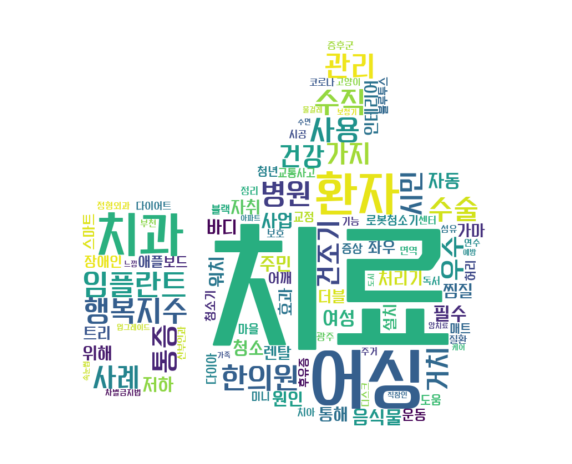

In [8]:
# -*- coding: utf-8 -*-
import pandas as pd
import requests
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
import konlpy 
from konlpy.tag import Okt 
from wordcloud import WordCloud
import numpy as np
from PIL import Image


data = pd.read_csv("result.csv",encoding="utf-8")
temp = data['제목']

temp = temp.tolist()
title = []

#한줄로 저장
title = "".join(temp)
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

#단어 빈도수 계산
okt = Okt()
frequency = okt.nouns(filtered_title)
frequency

#형태소분석
kor = nltk.Text(frequency)
kor.tokens
kor.vocab()

new_ko=[]
for word in ko:
    if len(word) > 1 and  word != '삶의질' and word != '향상' and  word != ' 'and  word != '상승'and  word != '개선'\
    and  word != '높이'and  word != '방법'and  word != '후기'and  word != '추천'and  word != '결정'and  word != '아이템':
        new_ko.append(word)
new_ko

#두번째 명사 추출 후 가장 많이 나오는
ko = nltk.Text(new_ko)
ko.tokens
ko.vocab()
data = ko.vocab().most_common(150)

data = dict(data)
#print(data)

#워드클라우드
wordcloud = WordCloud().generate(filtered_title)
font = 'C:\\Windows\\Fonts\YES24.ttf'

#모양 나타내기
mask = np.array(Image.open('good2.png'))
wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300, \
        mask=mask)
wc = wc.generate_from_frequencies(data)
#저장
wc.to_file("wordcloud.png")

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()